In [36]:
import numpy 
import pandas as pd
from matplotlib import pyplot
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from pandas import set_option 
from numpy import set_printoptions
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor


In [13]:
filename = 'housing (task4).csv'
names = [' CRIM ', ' ZN ', ' INDUS ', ' CHAS ', ' NOX ', ' RM ', ' AGE ', ' DIS ', ' RAD ', ' TAX ', ' PTRATIO ',
         ' B ', ' LSTAT ', ' MEDV ']
dataset = read_csv(filename, skipinitialspace=True, delim_whitespace=True, names=names)
dataset = dataset.dropna()
dataset.head(11)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


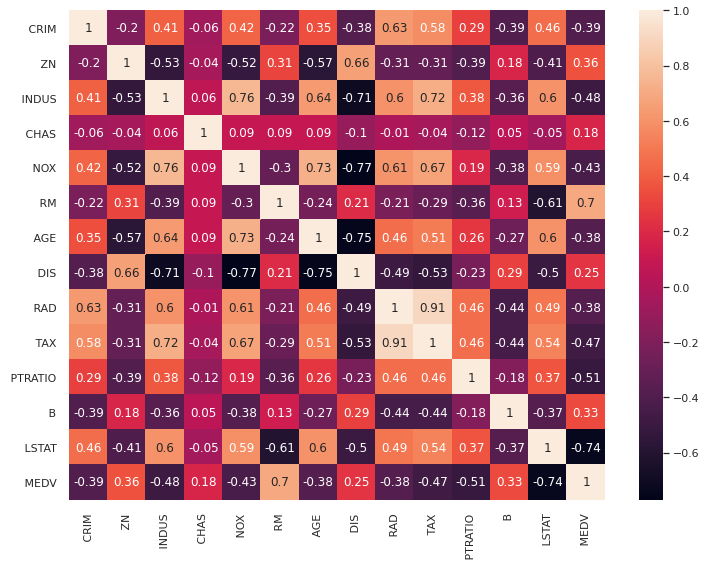

In [17]:
correlation_matrix = dataset.corr().round(2)
sns.set(rc={'figure.figsize':(12,9)})
sns.heatmap(data=correlation_matrix, annot=True)

In [18]:
array = dataset.values
X = array[:, 0:13]
Y = array[:, 13]

In [27]:
scaler = MinMaxScaler(feature_range=(0, 1))
rX = scaler.fit_transform(X)
set_printoptions(precision=4)
print(rX[0:1, :])

[[0.     0.18   0.0678 0.     0.3148 0.5775 0.6416 0.2692 0.     0.208
  0.2872 1.     0.0897]]


In [30]:
validation_size = 0.20
seed = 10
X_train, X_validation, Y_train, Y_validation = train_test_split(rX, Y,
                                                                test_size=validation_size, random_state=seed)

In [31]:
num_folds = 3
seed = 1
scoring = 'r2'

In [33]:
models = []
models.append((' LR ', LinearRegression()))
models.append((' CART ', DecisionTreeRegressor()))
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(
        model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

 LR : 0.707029 (0.044739)
 CART : 0.755268 (0.030775)


In [35]:
model = DecisionTreeRegressor(max_depth=20)
model.fit(X_train, Y_train)

predictions = model.predict(X_validation)
print(r2_score(Y_validation, predictions))

0.678006554889236


In [37]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = GradientBoostingRegressor(random_state=seed, n_estimators=100)
model.fit(rescaledX, Y_train)

rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(r2_score(Y_validation, predictions))

0.879988197553264
